## Load data

In [1]:
import sys

sys.path.insert(0, "../")

In [2]:
from dataAnalysis.data.Filter import Filter
import pandas as pd
from dataAnalysis.Constants import *
from dataAnalysis.DataAnalysis import DataAnalysis

data = pd.read_csv(r"../extdata/sbcdata.csv", header=0)
mimic_data = pd.read_csv(r"../extdata/mimic_cbc_v1.0.csv", header=0)
data_analysis = DataAnalysis(data, mimic_data = mimic_data, print_logs = True)

/home/dwalke/git/sbc/machine_learning/../dataAnalysis/data/Filter.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['Label'] = self.data['Diagnosis']
/home/dwalke/git/sbc/machine_learning/../dataAnalysis/data/Filter.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['Label'] = self.data['Diagnosis']


Training: 
Assessable data are 528101 cases and 1015074 CBCs
Control data are 527038 cases and 1013548 CBCs
Sepsis data are 1488 cases and 1526 CBCs


/home/dwalke/git/sbc/machine_learning/../dataAnalysis/data/Filter.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['Label'] = self.data['Diagnosis']


$$$$$$$$$$$$$$$$$$$$
Testing: 
Controls: 365794, Sepsis: 490
Assessable data are 180494 cases and 366284 CBCs
Control data are 180157 cases and 365794 CBCs
Sepsis data are 472 cases and 490 CBCs


/home/dwalke/git/sbc/machine_learning/../dataAnalysis/data/Filter.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['Label'] = self.data['Diagnosis']


Controls: 437629, Sepsis: 448
Assessable data are 157922 cases and 438077 CBCs
Control data are 157680 cases and 437629 CBCs
Sepsis data are 438 cases and 448 CBCs
Controls Mimic: 2508954, Sepsis Mimic: 2638
Assessable data Mimic are 558661 cases and 2511592 CBCs
Control data Mimic are 556622 cases and 2508954 CBCs
Sepsis data Mimic are 2513 cases and 2638 CBCs


In [3]:
from sklearn.model_selection import train_test_split
y_train = data_analysis.get_y_train()
X_train = data_analysis.get_X_train()

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

y_test = data_analysis.get_y_test()
X_test = data_analysis.get_X_test()

y_gw_test = data_analysis.get_y_gw()
X_gw_test = data_analysis.get_X_gw()

X_mimic = data_analysis.get_X_mimic()
y_mimic = data_analysis.get_y_mimic()

## Metrics definition

In [4]:
from dataAnalysis.Metrics import Evaluation

evaluation = Evaluation(y_test, y_gw_test, X_test, X_gw_test, y_mimic=y_mimic, X_mimic=X_mimic)

/home/dwalke/.local/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/home/dwalke/.local/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/home/dwalke/.local/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


## Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
import time
start = time.time()
logistic_regression = LogisticRegression(random_state=0, solver="liblinear", class_weight="balanced")
logistic_regression.fit(X_train, y_train)
print(time.time() -start)
print(evaluation.get_df_metrics(logistic_regression))
evaluation.plot_confusion_matrix(logistic_regression)

In [6]:
from feature_variation.PartialDependence import PartialDependence

partial_dependence = PartialDependence(logistic_regression, X_train)

In [8]:
from feature_variation.PartialDependence import PartialDependence

partial_dependence = PartialDependence(logistic_regression, X_train)

for feature_idx in range(X_train.shape[-1]):
    partial_dependence.close_sklearn(feature_idx)

Success
Success
Success
Success
Success
Success
Success


In [7]:
partial_dependence.write_partial_dependence_values()

## Decision Tree

1.725895643234253
          Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0      Leipzig  0.048042  0.750860  0.433119   0.008712  0.849361  0.009439
1   Greifswald  0.031094  0.671512  0.404079   0.004868  0.793381  0.004019
2  MIMIC-IV-v1  0.037217  0.729040  0.424583   0.006026  0.816841  0.006321


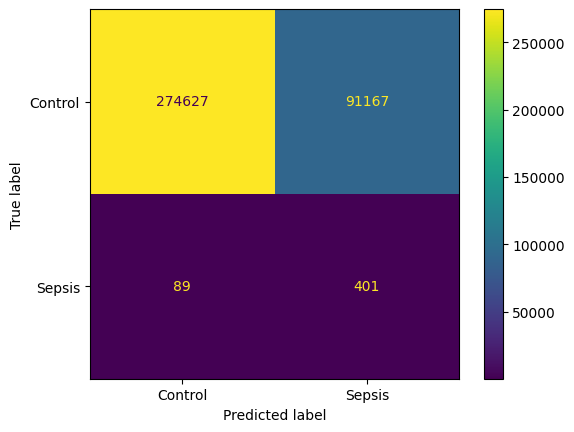

In [8]:
from sklearn.tree import DecisionTreeClassifier
import time
start = time.time()
decision_tree = DecisionTreeClassifier(random_state=42, max_features=6, min_samples_leaf=0.005,
                       min_samples_split=0.03, class_weight="balanced")
decision_tree.fit(X_train, y_train)
print(time.time() -start)
print(evaluation.get_df_metrics(decision_tree))
evaluation.plot_confusion_matrix(decision_tree)

In [10]:
from feature_variation.PartialDependence import PartialDependence

partial_dependence = PartialDependence(decision_tree, X_train)

for feature_idx in range(X_train.shape[-1]):
    partial_dependence.close_sklearn(feature_idx)

Success
Success
Success
Success
Success
Success
Success


In [17]:
partial_dependence = PartialDependence(decision_tree, X_train)
partial_dependence.write_partial_dependence_values()

## Random Forest

17.23015832901001
          Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0      Leipzig  0.061696  0.891243  0.478908   0.015374  0.869095  0.016729
1   Greifswald  0.038228  0.849469  0.463175   0.007794  0.816801  0.005673
2  MIMIC-IV-v1  0.051442  0.892571  0.477391   0.011583  0.843619  0.007831
[0.12918313 0.01371377 0.06172753 0.51610909 0.07503326 0.06020244
 0.14403079]


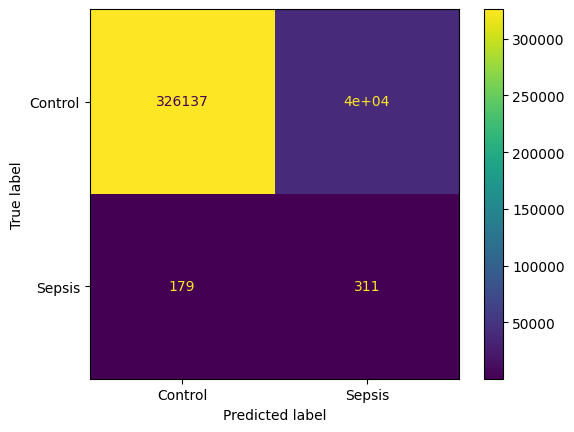

In [10]:
from sklearn.ensemble import RandomForestClassifier
import time
start = time.time()
random_forest = RandomForestClassifier(class_weight={0: 0.0025, 1: 1}, max_leaf_nodes=79,
                           min_samples_leaf=0.0001,
                           min_samples_split=0.0055,
                           n_estimators=500, random_state=42, n_jobs=-1)
random_forest.fit(X_train, y_train)
print(time.time() -start)
print(evaluation.get_df_metrics(random_forest))
evaluation.plot_confusion_matrix(random_forest)
print(random_forest.feature_importances_)

In [14]:
from feature_variation.PartialDependence import PartialDependence

partial_dependence = PartialDependence(random_forest, X_train)

for feature_idx in range(X_train.shape[-1]):
    partial_dependence.close_sklearn(feature_idx)

Success
Success
Success
Success
Success
Success
Success


In [16]:
partial_dependence = PartialDependence(random_forest, X_train)
partial_dependence.write_partial_dependence_values()

In [17]:
from sklearn.metrics import roc_curve
def get_threshold(y_val, y_probs, desired_specificity = 0.8):
    fpr, tpr, thresholds = roc_curve(y_val, y_probs)
    desired_fpr = 1-desired_specificity
    print(desired_fpr)
    # Find threshold for specific specificity
    for idx, fpr in enumerate(fpr):
        if fpr >= desired_fpr:
            threshold = thresholds[idx-1]
            break
    
    return threshold

In [18]:
y_pred_proba = random_forest.predict_proba(X_test)[:, 1]
get_threshold(y_test, y_pred_proba, 0.8)

0.19999999999999996


0.3525543592472427

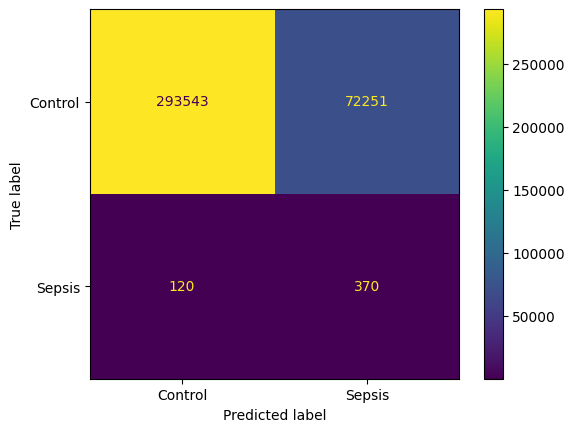

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = random_forest.predict_proba(X_test)[:, 1] >= 0.3525543592472427

confusion_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["Control", "Sepsis"])
cm_display.plot()

In [20]:
y_pred_proba_gw = random_forest.predict_proba(X_gw_test)[:, 1]
get_threshold(y_gw_test, y_pred_proba_gw, 0.8)

0.19999999999999996


0.4271545298847414

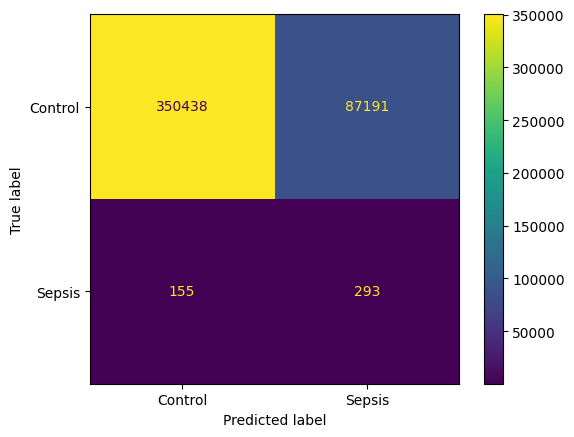

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_gw = y_pred_proba_gw >= 0.4271545298847414

confusion_matrix = confusion_matrix(y_gw_test, y_pred_gw)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["Control", "Sepsis"])
cm_display.plot()

In [10]:
from sklearn.metrics import roc_curve
from numpy import sqrt, argmax
fpr, tpr, thresholds = roc_curve(y_test, random_forest.predict_proba(X_test)[:,1])
gmeans = sqrt(tpr * (1-fpr))
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.354735, G-Mean=0.787


In [10]:
from joblib import dump, load
dump(random_forest, 'rf_limited_jobs.joblib')
dump(logistic_regression, 'lr.joblib')
dump(decision_tree, 'dt.joblib')
dump(xgb_classifier, 'xgb.joblib')

['xgb.joblib']

## Differently strict machine learning classifiers I

In [8]:
import numpy as np
from numpy import argmax
from numpy import sqrt
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, random_forest.predict_proba(X_test)[:, 1], pos_label=1)
gmeans = sqrt(tpr * (1-fpr))
ix = argmax(gmeans)

BEST_THRESHOLD = 0.5 # thresholds[ix]
CRITICAL_RANGE = .05
rf_proba = random_forest.predict_proba(X_test)[:, 1]
above_critical = rf_proba >= BEST_THRESHOLD-(CRITICAL_RANGE/2)
below_critical = rf_proba <= BEST_THRESHOLD+(CRITICAL_RANGE/2)
critical_proba = np.logical_and(above_critical, below_critical)
critical_proba.sum()
print(BEST_THRESHOLD)

0.5


In [9]:
indices = np.where(critical_proba)
pd.DataFrame(rf_proba[indices[0]]).describe()

,0
count,8908.000000
mean,0.499633
std,0.014418
min,0.475003
25%,0.487184
50%,0.499512
75%,0.512004
max,0.524993


In [10]:
lr_proba = logistic_regression.predict_proba(X_test[indices[0]])[:, 1]
rf_proba[indices] = lr_proba

In [11]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
auroc = roc_auc_score(y_test, rf_proba)
auprc = average_precision_score(y_test, rf_proba)
auroc, auprc

(0.8688362179538323, 0.013396052570576812)

## All n highest from rf to logistic regression

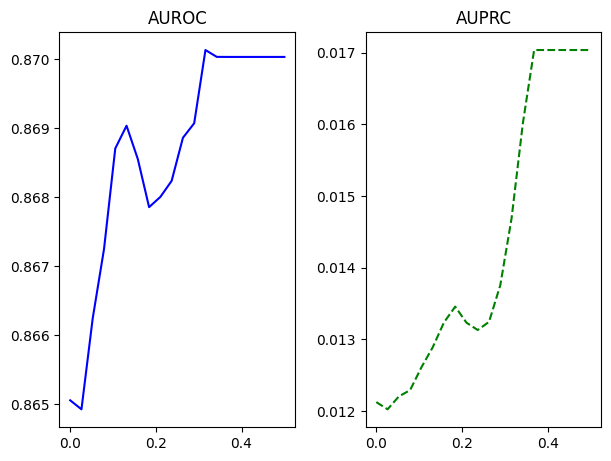

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score


clf1 = random_forest
clf2 = logistic_regression

thresholds = np.linspace(0,.5, 20, endpoint=True)
aurocs = []
auprcs = []
for i in thresholds:
    
    THRESHOLD = i
    rf_proba = clf1.predict_proba(X_test)[:, 1]
    highest_scores = rf_proba[rf_proba >= 0.5 + THRESHOLD]
    indices = np.where(highest_scores)[0]
    
    if indices.shape[0] > 0:
        lr_proba = clf2.predict_proba(X_test[indices])[:, 1]
        rf_proba[indices] = lr_proba
    
    auroc = roc_auc_score(y_test, rf_proba)
    auprc = average_precision_score(y_test, rf_proba)
    aurocs.append(auroc)
    auprcs.append(auprc)

fig, ax = plt.subplots(1, 2)
fig.tight_layout(pad=2.0)
plt.subplot(1, 2, 1)
plt.plot(thresholds, aurocs, "b-")
plt.title("AUROC")
plt.subplot(1, 2, 2)
plt.plot(thresholds, auprcs, "g--")
plt.title("AUPRC")
plt.show()

[]
(0,)
[     7     31     57 ... 366230 366236 366264]
(15699,)
[     7     16     31 ... 366264 366273 366278]
(32510,)
[     1      7     11 ... 366273 366275 366278]
(51260,)
[     1      6      7 ... 366275 366278 366282]
(71804,)
[     1      6      7 ... 366275 366278 366282]
(92719,)
[     1      6      7 ... 366277 366278 366282]
(114934,)
[     0      1      3 ... 366277 366278 366282]
(141800,)
[     0      1      3 ... 366278 366280 366282]
(173741,)
[     0      1      2 ... 366278 366280 366282]
(208522,)
[     0      1      2 ... 366279 366280 366282]
(248872,)
[     0      1      2 ... 366281 366282 366283]
(299429,)
[     0      1      2 ... 366281 366282 366283]
(345209,)
[     0      1      2 ... 366281 366282 366283]
(347742,)
[     0      1      2 ... 366281 366282 366283]
(350139,)
[     0      1      2 ... 366281 366282 366283]
(352653,)
[     0      1      2 ... 366281 366282 366283]
(355384,)
[     0      1      2 ... 366281 366282 366283]
(358265,)
[     0    

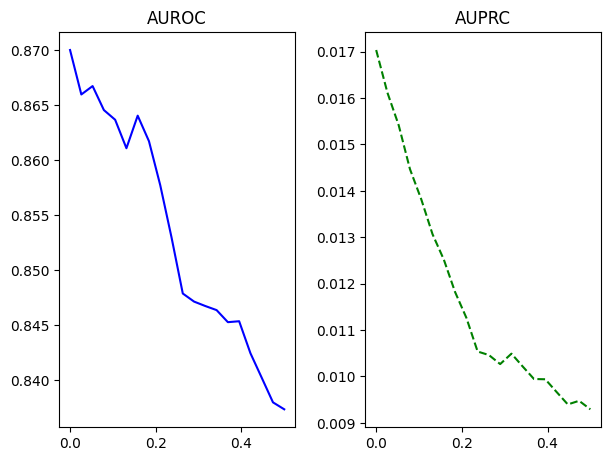

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score

thresholds = np.linspace(0,.5, 20, endpoint=True)
aurocs = []
auprcs = []

clf1 = random_forest
clf2 = logistic_regression

SEPERATOR = 0.3277982620869698 #.5

for i in thresholds:
    
    THRESHOLD = i
    rf_proba = clf1.predict_proba(X_test)[:, 1]
    highest_scores = rf_proba >= SEPERATOR - THRESHOLD
    lowest_scores = rf_proba <= SEPERATOR + THRESHOLD
    indices = np.where(np.logical_and(highest_scores, lowest_scores))[0]
    print(indices)
    print(indices.shape)
    if indices.shape[0] > 0:
        lr_proba = clf2.predict_proba(X_test[indices])[:, 1]
        rf_proba[indices] = lr_proba
    
    auroc = roc_auc_score(y_test, rf_proba)
    auprc = average_precision_score(y_test, rf_proba)
    aurocs.append(auroc)
    auprcs.append(auprc)

fig, ax = plt.subplots(1, 2)
fig.tight_layout(pad=2.0)
plt.subplot(1, 2, 1)
plt.plot(thresholds, aurocs, "b-")
plt.title("AUROC")
plt.subplot(1, 2, 2)
plt.plot(thresholds, auprcs, "g--")
plt.title("AUPRC")
plt.show()

In [14]:
np.asarray(aurocs).argmax()

0

In [15]:
aurocs[12], thresholds[12]

(0.8467607395396963, 0.3157894736842105)

## XG Boost

/home/dwalke/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [08:24:47] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


2.2816293239593506


/home/dwalke/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [08:24:49] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/dwalke/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [08:24:49] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


          Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0      Leipzig  0.076180  0.980605  0.515102   0.040000  0.872209  0.019790
1   Greifswald  0.038092  0.959792  0.496571   0.013663  0.805294  0.006737
2  MIMIC-IV-v1  0.053797  0.974065  0.504787   0.022715  0.836730  0.009508


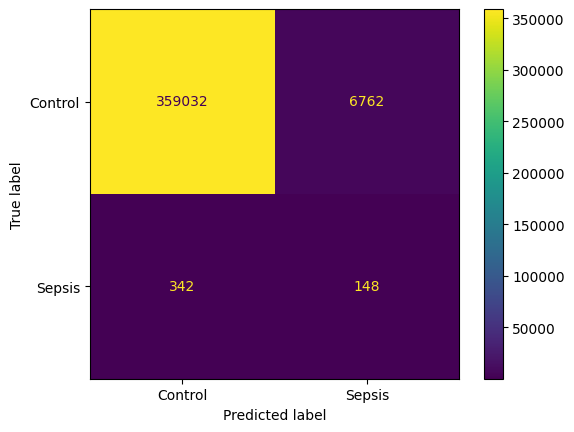

In [12]:
from xgboost import XGBClassifier
import time
start = time.time()

xgb_classifier = XGBClassifier(tree_method='gpu_hist', 
                           scale_pos_weight = 70,
                           n_estimators=1000,
                           max_depth=2,
                           eta=0.1,
                           min_child_weight = 7,
                           max_delta_step= 7,
                           sampling_method= "uniform")
xgb_classifier.fit(X_train, y_train)
print(time.time() -start)
print(evaluation.get_df_metrics(xgb_classifier))
evaluation.plot_confusion_matrix(xgb_classifier)

In [35]:
from feature_variation.PartialDependence import PartialDependence

partial_dependence = PartialDependence(xgb_classifier, X_train)

for feature_idx in range(X_train.shape[-1]):
    partial_dependence.close_sklearn(feature_idx)

Success
Success
Success
Success
Success
Success
Success


In [18]:
partial_dependence = PartialDependence(xgb_classifier, X_train)
partial_dependence.write_partial_dependence_values()

In [108]:
from sklearn.metrics import roc_curve
import numpy as np
def get_best_threshold(model):
    global X_val, y_val
    pred_proba = model.predict_proba(X_val)
    pred_proba = pred_proba[:, 1]
    fpr, tpr, thresholds = roc_curve(y_val, pred_proba)
    gmeans = np.sqrt(tpr * (1-fpr))
    ix = np.argmax(gmeans)
    return model.__class__.__name__, thresholds[ix]

In [109]:
get_best_threshold(random_forest)

('RandomForestClassifier', 0.3269368308502123)

In [110]:
get_best_threshold(xgb_classifier)

('XGBClassifier', 0.08329411)

In [111]:
get_best_threshold(decision_tree)

('DecisionTreeClassifier', 0.5479930767959986)

In [112]:
get_best_threshold(logistic_regression)

('LogisticRegression', 0.4746955641186002)

## RUS Boost

115.38006973266602
          Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0      Leipzig  0.058340  0.863265  0.469891   0.013240  0.866255  0.018062
1   Greifswald  0.037296  0.809125  0.450664   0.006912  0.815736  0.006053
2  MIMIC-IV-v1  0.047117  0.855355  0.465713   0.009445  0.840326  0.009055


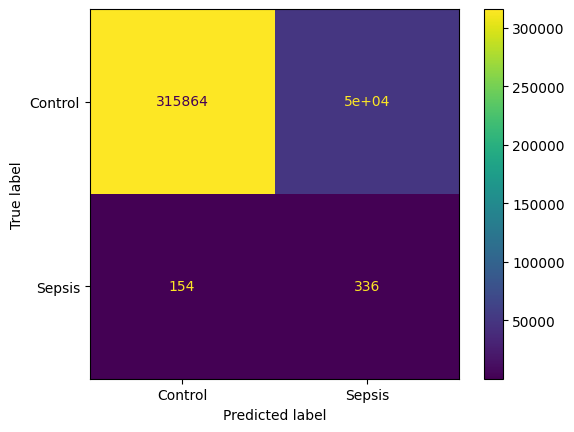

In [5]:
from imblearn.ensemble import RUSBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import time
start = time.time()
rus_boost = RUSBoostClassifier(estimator=DecisionTreeClassifier(max_depth=79, min_samples_leaf= 5, min_samples_split = 10),
                   learning_rate=0.90369, n_estimators=495,
                   random_state=0, sampling_strategy=35/65)
rus_boost.fit(X_train, y_train)
print(time.time() -start)
print(evaluation.get_df_metrics(rus_boost))
evaluation.plot_confusion_matrix(rus_boost)

In [7]:
from feature_variation.PartialDependence import PartialDependence

partial_dependence = PartialDependence(rus_boost, X_train)
partial_dependence.write_partial_dependence_values()

  0%|          | 0/7 [00:00<?, ?it/s]

## Feature variation

In [24]:
from dataAnalysis.FeatureImportance import FeatureImportance
feature_importance = FeatureImportance(X_train)

Ratio of diseased men/women over all CBCs for Logistic regression 42.135465625	34.24895


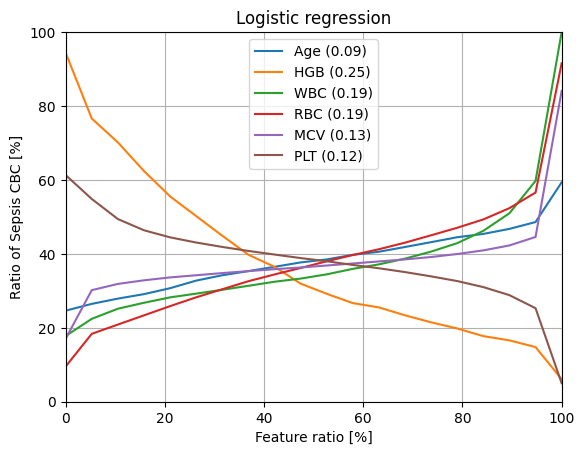

Ratio of diseased men/women over all CBCs for Decision tree 30.6701875	30.6701875


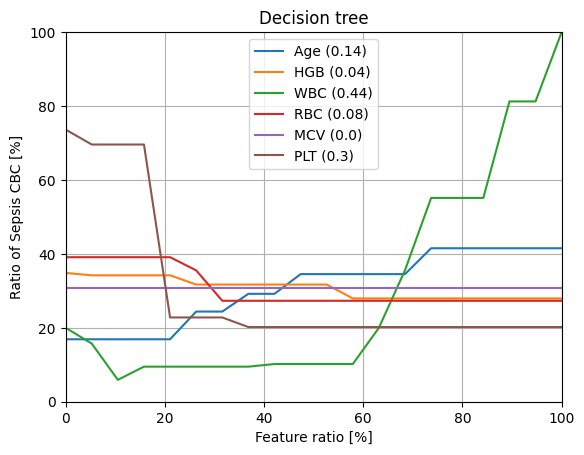

Ratio of diseased men/women over all CBCs for Random forest 16.939590625	15.3942140625


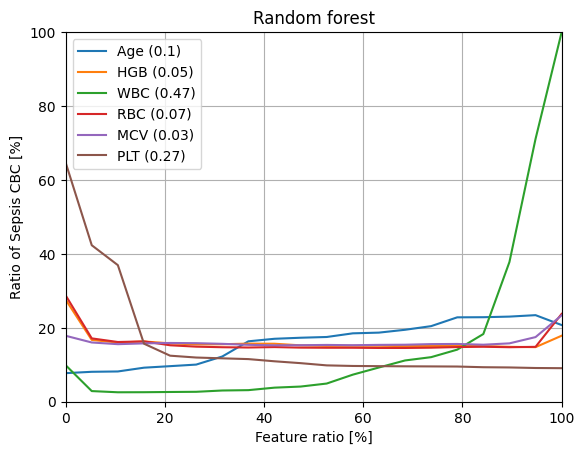

Ratio of diseased men/women over all CBCs for XGBoost 8.67485625	6.713271875


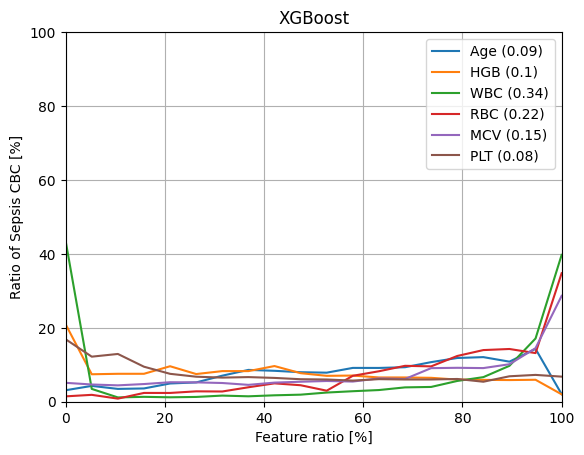

Ratio of diseased men/women over all CBCs for RUSBoost 22.5548015625	21.570149999999998


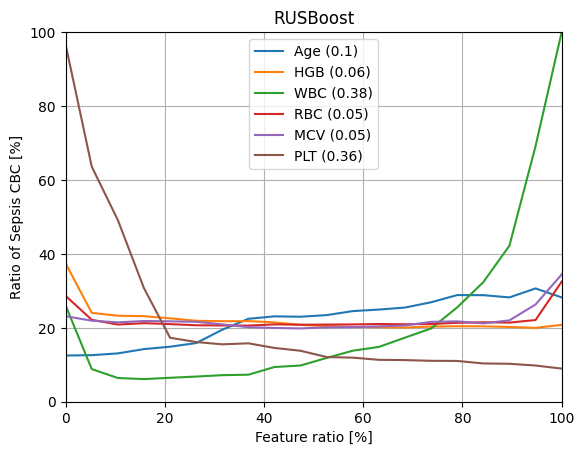

In [25]:
feature_importance.plot_feature_importance(logistic_regression, title = "Logistic regression", write=True)
feature_importance.plot_feature_importance(decision_tree, title="Decision tree", write=True)
feature_importance.plot_feature_importance(random_forest, title="Random forest", write=True)
feature_importance.plot_feature_importance(xgb_classifier, title="XGBoost", write=True)
feature_importance.plot_feature_importance(rus_boost, title="RUSBoost", write=True)

## Error evaluation

In [ ]:
import time

def error_evaluation(model):
    global X_train, y_train, evaluation
    dfs = []
    times = []
    for i in range(100):
        start = time.time()
        model.fit(X_train, y_train)
        times.append(time.time() - start)
        dfs.append(evaluation.get_df_metrics(model))
    return dfs, times    

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(solver="liblinear", class_weight="balanced")
dfs, times = error_evaluation(logistic_regression)
for t in times:
    print(t)
for df in dfs:
    print(df)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(class_weight="balanced", max_features=6, min_samples_leaf=0.005,
                           min_samples_split=0.03)
dfs, times = error_evaluation(decision_tree)
for t in times:
    print(t)
for df in dfs:
    print(df)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(class_weight={0: 0.0025, 1: 1}, max_leaf_nodes=79,
                           min_samples_leaf=0.0001,
                           min_samples_split=0.0055,
                           n_estimators=500)
dfs, times = error_evaluation(random_forest)
for t in times:
    print(t)
for df in dfs:
    print(df)

In [ ]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(tree_method='gpu_hist', 
                           scale_pos_weight = 660,
                           n_estimators=478,
                           max_depth=2,
                           eta=0.1,
                           min_child_weight = 7,
                           max_delta_step= 7,
                           sampling_method= "uniform")

dfs, times = error_evaluation(xgb_classifier)
for t in times:
    print(t)
for df in dfs:
    print(df)

In [ ]:
from imblearn.ensemble import RUSBoostClassifier
from sklearn.tree import DecisionTreeClassifier

rus_boost = RUSBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=79, min_samples_leaf= 5, min_samples_split = 10),
                   learning_rate=0.90369, n_estimators=495, sampling_strategy=35/65)
dfs, times = error_evaluation(rus_boost)
for t in times:
    print(t)
for df in dfs:
    print(df)

## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

def get_best_estimator(model, param_grid):
    grid = GridSearchCV(
    n_jobs=-1,
    cv=10,
    estimator=model,
    scoring=['roc_auc', "balanced_accuracy"],
    refit="balanced_accuracy",#'auroc',
    return_train_score=True,
    param_grid=param_grid,
    verbose= 10
    )
    grid.fit(X_train, y_train)
    return grid.best_estimator_
    

In [ ]:
from sklearn.linear_model import LogisticRegression

param_grid = {
    'max_iter': [100, 1000, 10000],
    'class_weight': ["balanced", 35/65, 40/60, 45/55],
    "penalty":["l1", "l2", None, "elasticnet"],
    "solver":["liblinear", "saga", "newton-cholesky"]
}
logistic_regression = get_best_estimator(LogisticRegression(random_state=0), param_grid)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
                'class_weight': [{
                    0:i,
                    1: 1
                } for i in np.linspace(0.01, 0.01, 100)]
}
decision_tree = get_best_estimator(DecisionTreeClassifier(random_state=42, max_features=6, min_samples_leaf=0.005,
                       min_samples_split=0.03), param_grid)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
param_grid={
                'class_weight': [{
                    0:i,
                    1: 1
                } for i in np.linspace(0.0024, 0.0026, 4)],
        'n_estimators': range(495, 595, 10)
    }
random_forest = get_best_estimator(RandomForestClassifier(max_leaf_nodes=79,
                           min_samples_leaf=0.0001,
                           min_samples_split=0.0055,
                           n_estimators=500, random_state=42), param_grid)

In [ ]:
un, counts = np.unique(y_train, return_counts=True)
counts[0]/counts[1]

In [ ]:
from xgboost import XGBClassifier
param_grid = {
    'max_depth': [2],
    'learning_rate': [0.1],
    'gamma': [0],
    'reg_lambda': [10],
    'scale_pos_weight': [1, 2, 4, 8, 16, 30, 50, 100, 150, 200, 400, 500,550, 600, 650, 700, 800, 850, 900],
    "min_child_weight": [7],
    "max_delta_step": [6],
    'n_estimators': [2, 5, 10, 15, 20, 50, 80, 100, 200, 300, 400, 450, 500, 550, 600, 700, 750, 800, 900, 1000, 1200, 1400]
}
xgb_classifier = get_best_estimator(XGBClassifier(tree_method='gpu_hist', gpu_id = 0,
                                                        seed = 42), param_grid)

In [ ]:
xgb_classifier

In [ ]:
xgb_classifier.n_estimators, xgb_classifier.scale_pos_weight